In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
# =======================
# 0. Definir ruta base del proyecto
# =======================
ruta_base = os.path.abspath(os.path.join(os.getcwd(), "..",".."))
ruta_gold = os.path.join(ruta_base, "gold")

In [29]:
df_top_10 = pd.read_parquet(os.path.join(ruta_gold, "top_10_campos_timeseries.parquet"))

In [31]:
 # --- 2. Preparar el análisis de tendencias ---
resultados_tendencia = []
lista_campos = df_top_10['campo'].unique()

In [33]:
 print(f"\nAnalizando la tendencia de {len(lista_campos)} campos...")


Analizando la tendencia de 10 campos...


In [35]:
# RESETEAR LA LISTA ANTES DE EMPEZAR EL CICLO
resultados_tendencia = []

In [37]:
# --- 3. Iterar sobre cada campo y calcular su tendencia ---
for campo_actual in lista_campos:
# Filtrar el DataFrame para el campo actual
        df_campo = df_top_10[df_top_10['campo'] == campo_actual].copy()
        
        # Asegurarse de que la fecha esté en formato datetime
        df_campo['fecha'] = pd.to_datetime(df_campo['fecha'])
        df_campo.sort_values('fecha', inplace=True)
        
        # Crear una variable numérica para el tiempo (X)
        # Usaremos "meses desde el inicio" como nuestra variable X
        df_campo['meses_desde_inicio'] = (df_campo['fecha'] - df_campo['fecha'].min()).dt.days // 30
        
        X = df_campo[['meses_desde_inicio']]
        y = df_campo['petroleo_mbd']
        
        # Entrenar un modelo de regresión lineal simple
        model = LinearRegression()
        model.fit(X, y)
        
        # La pendiente del modelo es el coeficiente (coef_)
        # Representa el cambio promedio en la producción por cada mes que pasa
        pendiente = model.coef_[0]
        
        # Guardar el resultado
        resultados_tendencia.append({'campo': campo_actual, 'tendencia_mensual': pendiente})


In [39]:
 # --- 4. Presentar los resultados ---
df_tendencias = pd.DataFrame(resultados_tendencia)
df_tendencias.sort_values(by='tendencia_mensual', ascending=False, inplace=True)
df_tendencias.reset_index(drop=True, inplace=True)


In [41]:
print("\n--- Ranking de Campos por Tendencia de Producción ---")
print("(Una tendencia positiva significa crecimiento; negativa significa declive)")
print(df_tendencias)


--- Ranking de Campos por Tendencia de Producción ---
(Una tendencia positiva significa crecimiento; negativa significa declive)
     campo  tendencia_mensual
0  AYATSIL           0.727245
1    BALAM           0.482782
2   YAXCHE           0.377404
3     ONEL          -0.211003
4     AKAL          -0.497544
5      XUX          -0.661652
6    XANAB          -0.942925
7   MALOOB          -1.267807
8       KU          -1.328334
9     ZAAP          -1.433532


In [43]:
# Seleccionar los campos clave para mostrar
campos_clave = ["AYATSIL", "MALOOB", "AKAL"]
df_filtrado = df_top_10[df_top_10["campo"].isin(campos_clave)]

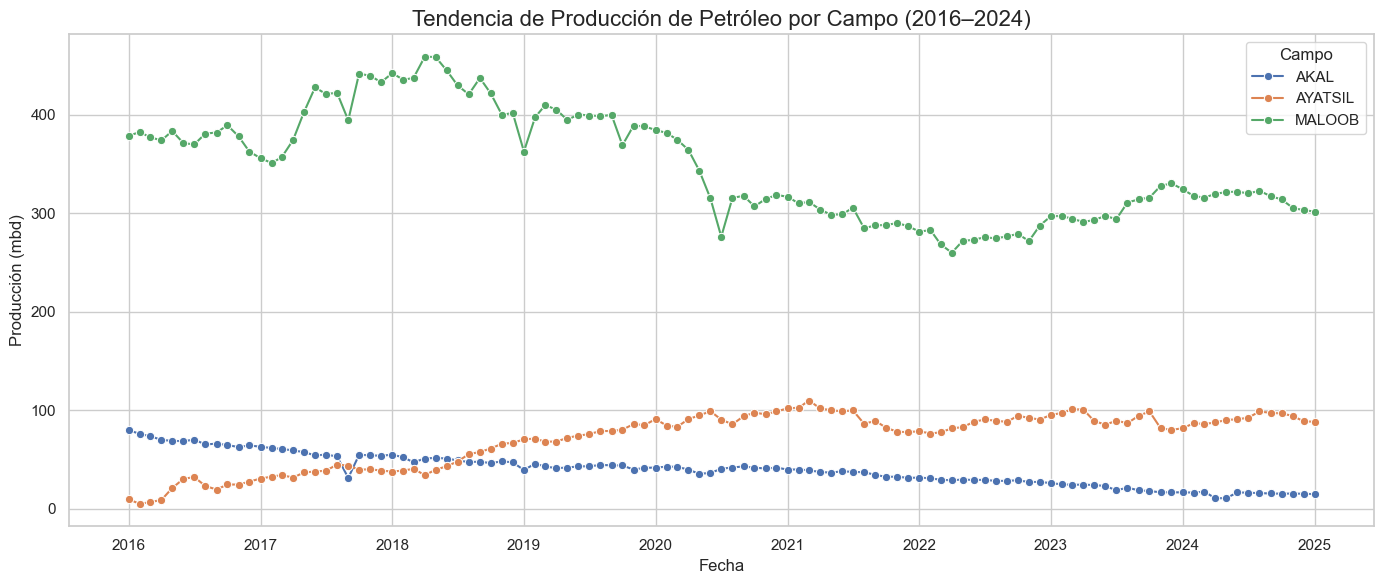

In [53]:
#Estilo visual
sns.set(style="whitegrid")
# Crear el gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_filtrado,
    x="fecha",
    y="petroleo_mbd",
    hue="campo",
    marker="o"
)

ruta_graficas = os.path.join(ruta_base, "ml", "graficas")
nombre_archivo = "01_tendencia_candidatos.png"
ruta_salida = os.path.join(ruta_graficas, nombre_archivo)

# Personalizar el gráfico
plt.title("Tendencia de Producción de Petróleo por Campo (2016–2024)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Producción (mbd)", fontsize=12)
plt.legend(title="Campo")
plt.tight_layout()
plt.savefig(ruta_salida, dpi=300, bbox_inches='tight')
plt.show()

